In [ ]:
# run this line in terminal to install (pip) matplotlib
# python -m pip install matplotlib
import matplotlib.pyplot as plt

#%matplotlib inline 

from sklearn import datasets


# Create a class Circle

class Circle(object):
    
    # Constructor
    def __init__(self, radius=3, color='blue'):
        self.radius = radius
        self.color = color 
    
    # Method
    def add_radius(self, r):
        self.radius = self.radius + r
        return(self.radius)
    
    # Method
    def drawCircle(self):
        plt.gca().add_patch(plt.Circle((0, 0), radius=self.radius, fc=self.color))
        plt.axis('scaled')
        plt.show()  



RedCircle = Circle(10, 'red')
BlueCircle = Circle(10, 'blue')
print('Radius of red circle is: ',RedCircle.radius)
print('Radius of object:',RedCircle.radius)
RedCircle.add_radius(2)
print('Radius of object of after applying the method add_radius(2):',RedCircle.radius)
RedCircle.add_radius(5)
print('Radius of object of after applying the method add_radius(5):',RedCircle.radius)





In [ ]:
RedCircle.drawCircle()

In [ ]:
BlueCircle = Circle(radius=100)
BlueCircle.drawCircle()


In [ ]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import datasets
from sklearn.decomposition import PCA

# import some data to play with
iris = datasets.load_iris()
X = iris.data[:, :2]  # we only take the first two features.
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

plt.figure(2, figsize=(8, 6))
plt.clf()

# Plot the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Set1, edgecolor="k")
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())

# To getter a better understanding of interaction of the dimensions
# plot the first three PCA dimensions
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

Coefficients: 
 [938.23786125]
Mean squared error: 2548.07
Coefficient of determination: 0.47


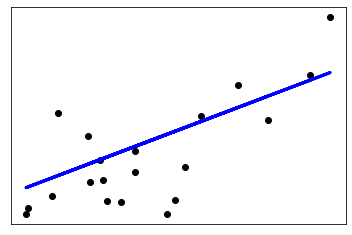

In [7]:
# this is from <Page 38, or file page# 51> of 
# textbook Hands-On Machine Learning for Cyber Security, 
# the chapter 1 introduced on sklearn. 


# print(__doc__)
# Code source: Jaques Grobler
# License: BSD 3 clause
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

# Load the diabetes dataset
diabetes = datasets.load_diabetes()
# print(diabetes.data.shape) # gives the data size and dimensions
# print(diabetes.feature_names)
# print(diabetes.DESCR) # this print paras describing the data set
# key output ==== printing DESCR
# Diabetes dataset
# ----------------

# Ten baseline variables, age, sex, body mass index, average blood
# pressure, and six blood serum measurements were obtained for each of n =
# 442 diabetes patients, as well as the response of interest, a
# quantitative measure of disease progression one year after baseline.

# **Data Set Characteristics:**

#   :Number of Instances: 442

#   :Number of Attributes: First 10 columns are numeric predictive values

#   :Target: Column 11 is a quantitative measure of disease progression one year after baseline
#   :Attribute Information:
#       - age     age in years
#       - sex
#       - bmi     body mass index
#       - bp      average blood pressure
#       - s1      tc, total serum cholesterol
#       - s2      ldl, low-density lipoproteins
#       - s3      hdl, high-density lipoproteins
#       - s4      tch, total cholesterol / HDL
#       - s5      ltg, possibly log of serum triglycerides level
#       - s6      glu, blood sugar level




# Use only one feature which the BMI, strange is that BMI 
# is not represented by 2 (starts from 0 ?!?)
# diabetes_X = diabetes.data[:, np.newaxis, 3]

# print(diabetes_X)

# diabetes_X = diabetes.data[:, np.newaxis, 1]

# print(diabetes_X)


# Load the diabetes dataset
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
diabetes_X = diabetes_X[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

#       this part is from sklearn site
# Split the targets into training/testing sets
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]


# this part is from book
# # Split the targets into training/testing sets
# diabetes_y_train = diabetes.target[:-20]
# # everything except the last two items
# diabetes_y_test = diabetes.target[-20:]

# this part is from book and produced the following
# these lines make no difference to the output 
# Coefficients: 
#  [938.23786125]
# Mean squared error: 2548.07
# Coefficient of determination: 0.47


# but the interesting observation is that the 
# inported datasets if successully imported will 
# give dot.something  diabetes.something

# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
regr.fit(diabetes_X_train, diabetes_y_train)

# Make predictions using the testing set
diabetes_y_pred = regr.predict(diabetes_X_test)

# The coefficients
print("Coefficients: \n", regr.coef_)
# The mean squared error
print("Mean squared error: %.2f" % mean_squared_error(diabetes_y_test, diabetes_y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(diabetes_y_test, diabetes_y_pred))

# Plot outputs
plt.scatter(diabetes_X_test, diabetes_y_test, color="black")
plt.plot(diabetes_X_test, diabetes_y_pred, color="blue", linewidth=3)

plt.xticks(())
plt.yticks(())

plt.show()